### Name: Harshit Vansh
### Task 3: EDA on Superstore Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dskhf


In [3]:
train=pd.read_csv('SampleSuperstore.csv')
train.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


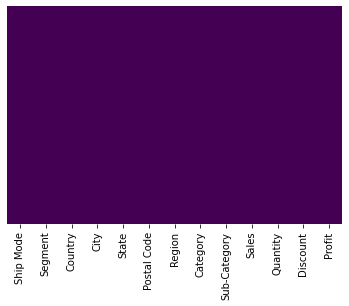

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
train.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [12]:
train.shape

(9994, 13)

In [14]:
train.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
train.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [19]:
train['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [20]:
train['Segment'].value_counts()/len(train['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

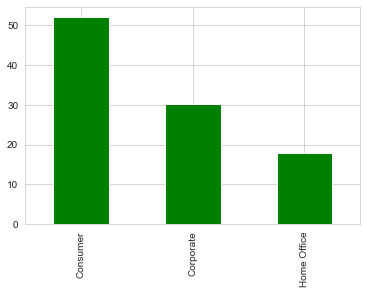

In [21]:
S=(train['Segment'].value_counts()/len(train['Segment'])*100).plot(kind='bar', color='g')

In [22]:
train['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [27]:
M=train['Ship Mode'].value_counts()/len(train['Ship Mode'])*100
M

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

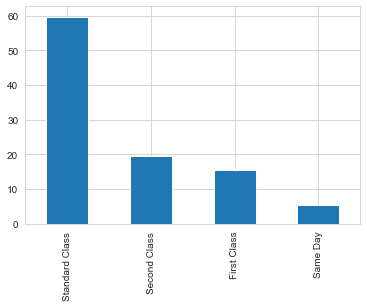

In [28]:
M.plot(kind='bar')

In [29]:
train['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

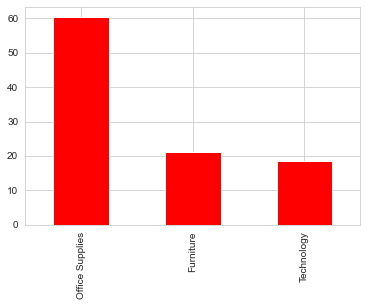

In [33]:
C=train['Category'].value_counts()/len(train['Category'])*100
C.plot(kind='bar', color='r')

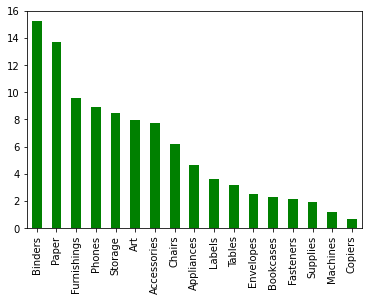

In [5]:
((train['Sub-Category'].value_counts())/len(train['Sub-Category'])*100).plot(kind='bar', color='g')

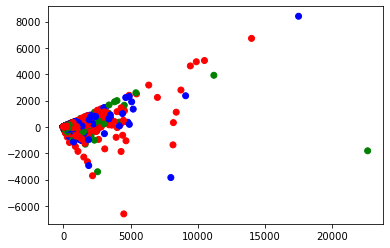

In [12]:
fig, ax=plt.subplots()
colors={'Consumer':'red', 'Corporate':'blue', 'Home Office':'green'}
ax.scatter(train['Sales'], train['Profit'], c=train['Segment'].apply(lambda x:colors[x]))
plt.show()

In [14]:
train.pivot_table(values='Sales', index='Segment', columns='Discount', aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [4]:
train.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


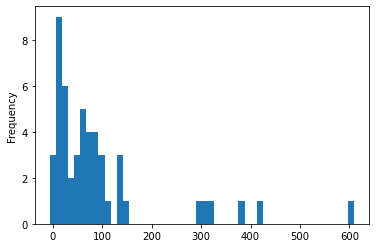

In [7]:
temp_train=train.loc[(train['Segment']=='Consumer')&(train['Discount']==0.1)]
temp_train['Profit'].plot.hist(bins=50)

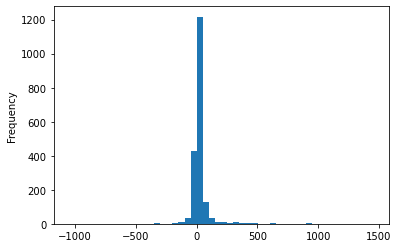

In [8]:
temp_train=train.loc[(train['Segment']=='Consumer')&(train['Discount']==0.2)]
temp_train['Profit'].plot.hist(bins=50)

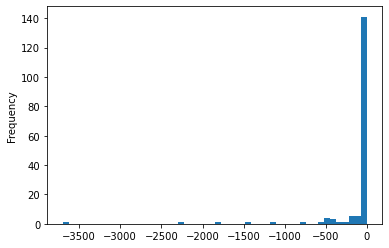

In [9]:
temp_train=train.loc[(train['Segment']=='Consumer')&(train['Discount']==0.8)]
temp_train['Profit'].plot.hist(bins=50)

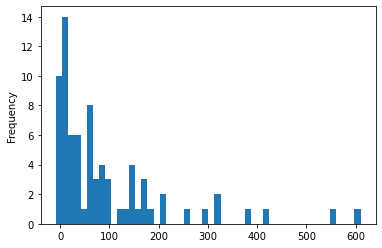

In [10]:
temp_train=train.loc[(train['Category']=='Furniture')&(train['Discount']==0.1)]
temp_train['Profit'].plot.hist(bins=50)

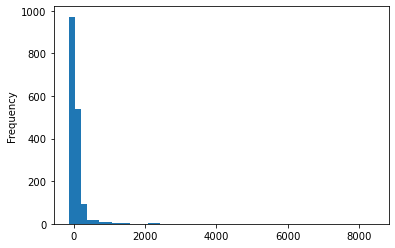

In [11]:
temp_train=train.loc[(train['Category']=='Technology')&(train['Discount']<=0.3)]
temp_train['Profit'].plot.hist(bins=50)

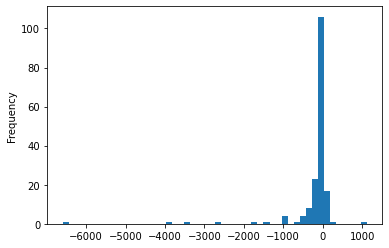

In [12]:
temp_train=train.loc[(train['Category']=='Technology')&(train['Discount']>=0.3)]
temp_train['Profit'].plot.hist(bins=50)

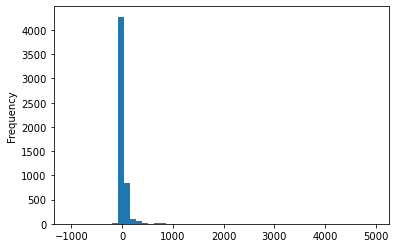

In [13]:
temp_train=train.loc[(train['Category']=='Office Supplies')&(train['Discount']<=0.3)]
temp_train['Profit'].plot.hist(bins=50)

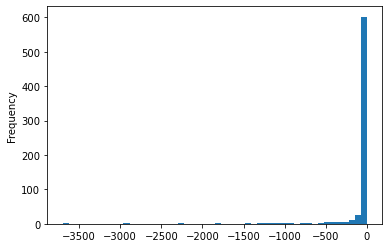

In [14]:
temp_train=train.loc[(train['Category']=='Office Supplies')&(train['Discount']>=0.3)]
temp_train['Profit'].plot.hist(bins=50)

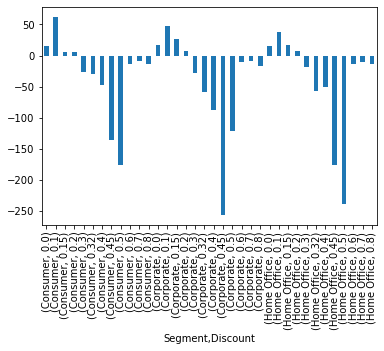

In [15]:
temp=train.groupby(['Segment', 'Discount']).Profit.median()
temp.plot(kind='bar', stacked=True)